In [11]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pytz

In [2]:
df = pd.read_csv('data_elonmusk.csv', encoding='latin1', parse_dates=['Time'])
df = df.drop(df.columns[0], axis=1)
df

,Tweet,Time,Retweet from,User
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk
...,...,...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:03,NaN,elonmusk
3214,These articles in Space News describe why Aria...,2012-11-20 08:38:31,NaN,elonmusk
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:44,NaN,elonmusk
3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:46,NaN,elonmusk


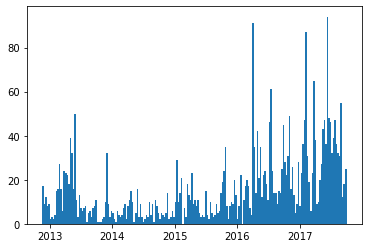

In [4]:
df.Time.hist(bins=200, grid=False);

In [5]:
df = df.rename(columns={'Time': 'DateTime'})
df['Time'] = df.DateTime.dt.time
df

,Tweet,DateTime,Retweet from,User,Time
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk,17:39:19
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk,10:44:54
2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk,10:39:57
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk,09:56:12
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk,09:19:21
...,...,...,...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:03,NaN,elonmusk,08:52:03
3214,These articles in Space News describe why Aria...,2012-11-20 08:38:31,NaN,elonmusk,08:38:31
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:44,NaN,elonmusk,08:30:44
3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:46,NaN,elonmusk,08:59:46


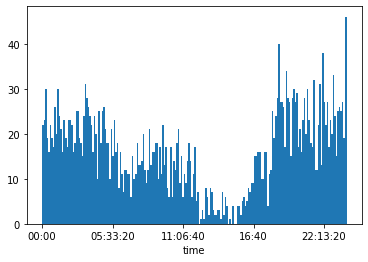

In [6]:
df.Time.hist(bins=200, grid=False);

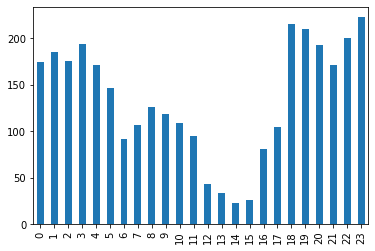

In [7]:
df.DateTime.dt.hour.value_counts().sort_index().plot.bar();

In [8]:
df.DateTime = df.DateTime.dt.tz_localize('Europe/Istanbul')
df

,Tweet,DateTime,Retweet from,User,Time
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19+03:00,NaN,elonmusk,17:39:19
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54+03:00,SpaceX,elonmusk,10:44:54
2,@bigajm Yup :),2017-09-29 10:39:57+03:00,NaN,elonmusk,10:39:57
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12+03:00,NaN,elonmusk,09:56:12
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21+03:00,NaN,elonmusk,09:19:21
...,...,...,...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:03+02:00,NaN,elonmusk,08:52:03
3214,These articles in Space News describe why Aria...,2012-11-20 08:38:31+02:00,NaN,elonmusk,08:38:31
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:44+02:00,NaN,elonmusk,08:30:44
3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:46+02:00,NaN,elonmusk,08:59:46


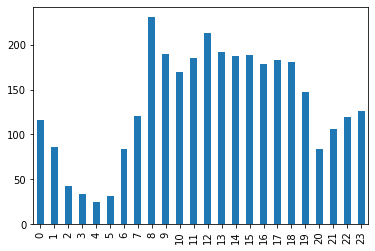

In [9]:
df['LATime'] = df.DateTime.dt.tz_convert('America/Los_Angeles')
df.LATime.dt.hour.value_counts().sort_index().plot.bar();

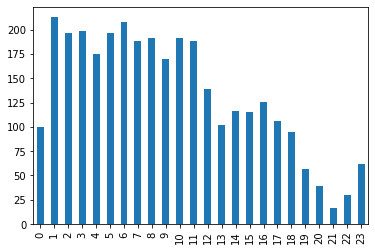

In [10]:
df['AussieTime'] = df.DateTime.dt.tz_convert('Australia/Brisbane')
df.AussieTime.dt.hour.value_counts().sort_index().plot.bar();

In [12]:
for t in pytz.all_timezones:
    print(t)

Africa/Abidjan
Africa/Accra
Africa/Addis_Ababa
Africa/Algiers
Africa/Asmara
Africa/Asmera
Africa/Bamako
Africa/Bangui
Africa/Banjul
Africa/Bissau
Africa/Blantyre
Africa/Brazzaville
Africa/Bujumbura
Africa/Cairo
Africa/Casablanca
Africa/Ceuta
Africa/Conakry
Africa/Dakar
Africa/Dar_es_Salaam
Africa/Djibouti
Africa/Douala
Africa/El_Aaiun
Africa/Freetown
Africa/Gaborone
Africa/Harare
Africa/Johannesburg
Africa/Juba
Africa/Kampala
Africa/Khartoum
Africa/Kigali
Africa/Kinshasa
Africa/Lagos
Africa/Libreville
Africa/Lome
Africa/Luanda
Africa/Lubumbashi
Africa/Lusaka
Africa/Malabo
Africa/Maputo
Africa/Maseru
Africa/Mbabane
Africa/Mogadishu
Africa/Monrovia
Africa/Nairobi
Africa/Ndjamena
Africa/Niamey
Africa/Nouakchott
Africa/Ouagadougou
Africa/Porto-Novo
Africa/Sao_Tome
Africa/Timbuktu
Africa/Tripoli
Africa/Tunis
Africa/Windhoek
America/Adak
America/Anchorage
America/Anguilla
America/Antigua
America/Araguaina
America/Argentina/Buenos_Aires
America/Argentina/Catamarca
America/Argentina/ComodRivad